# Import Req. Packages

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 10)
rcParams['font.size'] = 15

# Import the dataset

In [3]:
!dir

 Volume in drive A is Work
 Volume Serial Number is 36AC-A50E

 Directory of A:\Learnbay\Datasets for Case Study\Education in India\All India Survey on Higher Education - 2015-16\Examination_Results

03-Oct-18  05:43 PM    <DIR>          .
03-Oct-18  05:43 PM    <DIR>          ..
26-Sep-18  12:58 PM    <DIR>          .ipynb_checkpoints
03-Oct-18  05:43 PM           583,926 Case_Study_Exam_Results_Survey.ipynb
18-Sep-18  11:38 PM        24,969,753 Examination_Results_of_Colleges_2015-16.csv
26-Sep-18  10:15 AM        24,052,305 Examination_Results_of_Colleges_2015-16_updated_with_Stream.csv
18-Sep-18  11:37 PM         2,579,034 Examination_Results_of_Standalone_Institutes_2015-16.csv
18-Sep-18  05:14 PM         3,901,982 Examination_Results_of_Universities_2015-16.csv
25-Sep-18  01:01 PM             3,738 Exam_Results_Explanation_n_Operations_Guide.ipynb
18-Sep-18  11:37 PM            46,349 Result_of_Private_or_External_Students_of_Universities_2015-16.csv
25-Sep-18  11:26 AM          

In [4]:
results_df = pd.read_csv('Examination_Results_of_Colleges_2015-16.csv')
results_df.head()

,id,survey_year,name,course_mode,course_level,programme_id,programme,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
0,8719,2015,MR.S.M. College Anandpur,Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Sanskrit,1.0,1.0,1,1,1.0,1.0
1,8719,2015,MR.S.M. College Anandpur,Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Geography,5.0,24.0,2,19,2.0,12.0
2,46142,2015,"RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, ...",Regular,Under Graduate,36,B.Tech.-Bachelor of Technology,20,Electronics Engineering,ECE,7.0,48.0,5,33,5.0,32.0
3,54826,2015,"SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA",Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0
4,18452,2015,"Shankarlal Agarwal Science College, Salkesa",Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0


### Note:

1. We observe `survey_year` to be the same for these 5 rows... The survey was conducted for 2015-16. This means that we must check all the values that exist in this column.
<br><br>
2. Observe that `course_mode` has `Regular` value. Sounds like there might 2 or 3 types of course_modes. Let's check out those types. You can convert this to categorical data type.
<br><br>
3. Observe that `course_level` has `Under Graduate`. This might also be a categorical column. Hence check for the values.
<br><br>
4. It's rather interesting to know how many `colleges(name)`, `broad_discipline_group`, `discipline`, `programmes` exists.
<br><br>
5. The most interesting thing in the dataset for us is are the columns related to statistic of passing and the percentage of girls. What all can be inferred from the given dataset?

## Check basic info about the dataset

In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158358 entries, 0 to 158357
Data columns (total 16 columns):
id                           158358 non-null int64
survey_year                  158358 non-null int64
name                         158358 non-null object
course_mode                  158358 non-null object
course_level                 158358 non-null object
programme_id                 158358 non-null int64
programme                    158358 non-null object
discipline_group_id          158358 non-null int64
broad_discipline_group       158358 non-null object
discipline                   158325 non-null object
appeared_female              157358 non-null float64
appeared_total               157435 non-null float64
passed_female                158358 non-null int64
passed_total                 158358 non-null int64
first_class_passed_female    156824 non-null float64
first_class_passed_total     156996 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 19.3+

### Note:

1. `appeared_female`, `appeared_total`, `first_class_passed_female` & `first_class_passed_total` have lesser number of Non-Null values ( < 1,58,358).

## Let's get a basic statistic of the data

In [6]:
results_df.describe()

,id,survey_year,programme_id,discipline_group_id,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
count,158358.000000,158358.0,158358.000000,158358.000000,157358.000000,157435.000000,158358.000000,158358.000000,156824.000000,156996.000000
mean,27647.123233,2015.0,72.571938,90.584037,25.845937,50.959564,20.814351,39.324246,11.784516,21.615723
std,14356.655117,0.0,58.434069,68.454650,67.524327,120.106449,57.437692,98.250686,28.234654,45.070505
min,15.000000,2015.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15427.000000,2015.0,17.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,27540.000000,2015.0,50.000000,93.000000,8.000000,20.000000,6.000000,14.000000,3.000000,7.000000
75%,40327.000000,2015.0,124.000000,171.000000,26.000000,56.000000,21.000000,42.000000,13.000000,25.000000
max,55617.000000,2015.0,201.000000,189.000000,4201.000000,5970.000000,4201.000000,5815.000000,1700.000000,2516.000000


### Note:

1. This does not say anything much about the data expect that you can observe that `survey_year` is 2015 for all rows. Let's verify that.

# Data Cleaning

In [7]:
# To check the all the values that exit in the column `survey_year`
# Use .unique() method on the column to show all the unique values in that column.

results_df['survey_year'].unique()
# results_df.survey_year.unique()            # Yeilds the same result as above!

array([2015], dtype=int64)

***Our hunch is true... It's best to drop this this column as it is redundant!!***

### <span style="color:darkred">***Pandas has a lot of ways of implementing the same thing. It might get very confusing in the start. Hence, it is advised to use the same convention until you are comfortable with it.***</span>

In [8]:
# To drop column `survey_year`
results_df = results_df.drop('survey_year', axis=1)
results_df.head()

,id,name,course_mode,course_level,programme_id,programme,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
0,8719,MR.S.M. College Anandpur,Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Sanskrit,1.0,1.0,1,1,1.0,1.0
1,8719,MR.S.M. College Anandpur,Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Geography,5.0,24.0,2,19,2.0,12.0
2,46142,"RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, ...",Regular,Under Graduate,36,B.Tech.-Bachelor of Technology,20,Electronics Engineering,ECE,7.0,48.0,5,33,5.0,32.0
3,54826,"SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA",Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0
4,18452,"Shankarlal Agarwal Science College, Salkesa",Regular,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0


#### Let's now check for `course_mode`

In [9]:
results_df['course_mode'].unique()

array(['Regular'], dtype=object)

In [10]:
results_df = results_df.drop('course_mode', axis=1)
results_df.head()

,id,name,course_level,programme_id,programme,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
0,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Sanskrit,1.0,1.0,1,1,1.0,1.0
1,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Geography,5.0,24.0,2,19,2.0,12.0
2,46142,"RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, ...",Under Graduate,36,B.Tech.-Bachelor of Technology,20,Electronics Engineering,ECE,7.0,48.0,5,33,5.0,32.0
3,54826,"SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA",Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0
4,18452,"Shankarlal Agarwal Science College, Salkesa",Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0


#### Let's now check for `course_level`

In [11]:
pd.DataFrame(results_df['course_level'].unique())    # An array can be converted into a DataFrame.

,0
0,Under Graduate
1,Post Graduate
2,Diploma
3,PG Diploma
4,Certificate
5,Integrated
6,M.Phil.
7,Ph.D.


But `M.Phil.` is not supposed to be a course level. It is a `Prost Graduate` degree. You must change the values having `M.Phil.` to  `Post Graduate`.

Let's check how many rows have `M.Phil.` as their values.

In [12]:
# DataFrame slicing

# results_df[results_df['course_level'] == 'M.Phil.']         # This actually creates a copy of the original dataset.

# This statement is very confusing as it does not 
# specify whether the slicing is for columns or for rows!
# We can instead use the .loc method for slicing!

results_df.loc[results_df['course_level'] == 'M.Phil.', :]   # This yeilds the same result as above and less confusing!

,id,name,course_level,programme_id,programme,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
80,7132,Shree Swami Sahajanand College of Commerce and...,M.Phil.,109,M.Phil.-Master of Philosophy,9,Commerce,Commerce,13.0,16.0,13,16,13.0,16.0
584,41276,"K.T.H.M.Arts, Science and Commerce College and...",M.Phil.,109,M.Phil.-Master of Philosophy,106,Zoology,Zoology,8.0,11.0,0,0,0.0,0.0
709,9553,Kailash Womens College,M.Phil.,109,M.Phil.-Master of Philosophy,95,Computer Science,Computer Science,29.0,29.0,28,28,28.0,28.0
715,9552,Sri Sarada College for Women(Autonomous),M.Phil.,109,M.Phil.-Master of Philosophy,111,History,History,3.0,3.0,3,3,3.0,3.0
718,9552,Sri Sarada College for Women(Autonomous),M.Phil.,109,M.Phil.-Master of Philosophy,104,Physics,Physics,15.0,15.0,15,15,15.0,15.0
782,36386,"St.Joseph College of Arts & Science College,Au...",M.Phil.,109,M.Phil.-Master of Philosophy,143,Bio-Chemistry,Biochemistry,2.0,3.0,2,3,2.0,3.0
783,36386,"St.Joseph College of Arts & Science College,Au...",M.Phil.,109,M.Phil.-Master of Philosophy,156,Microbiology,Microbiology,1.0,1.0,1,1,1.0,1.0
785,36386,"St.Joseph College of Arts & Science College,Au...",M.Phil.,109,M.Phil.-Master of Philosophy,8,Area Studies,History,0.0,0.0,0,0,0.0,0.0
1164,9488,Vivekanandha College of Arts & Science (W),M.Phil.,109,M.Phil.-Master of Philosophy,9,Commerce,Commerce,25.0,25.0,19,19,10.0,10.0
1510,7247,"Manipal College of Nursing, Manipal",M.Phil.,109,M.Phil.-Master of Philosophy,72,Nursing,Nursing,4.0,5.0,4,5,4.0,5.0


#### *Let's replace `M.Phil.` -> `Post Graduate`*

In [13]:
results_df.loc[results_df['course_level'] == 'M.Phil.', 'course_level'] = 'Post Graduate'
pd.DataFrame(results_df['course_level'].unique())

,0
0,Under Graduate
1,Post Graduate
2,Diploma
3,PG Diploma
4,Certificate
5,Integrated
6,Ph.D.


### Time to convert this to categorical Data Type.

In [14]:
results_df['course_level'] = results_df['course_level'].astype('category')
results_df['course_level'].dtype

CategoricalDtype(categories=['Certificate', 'Diploma', 'Integrated', 'PG Diploma',
                  'Ph.D.', 'Post Graduate', 'Under Graduate'],
                 ordered=False)

In [15]:
results_df['name'].unique()

array(['MR.S.M. College Anandpur',
       'RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, GHAZIABAD',
       'SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA', ...,
       'Ram Gopal College of Pharmacy, Vill Sultanpur Gurgaon',
       'Prajasattak College of Education, Bhandara Road',
       'J.N.R. Ladda Law College, Sedam'], dtype=object)

#### This does not show the number of colleges. Therefore, 

In [16]:
results_df['name'].nunique()

35029

This implies that there are 35,000 odd colleges.

It is not appropriate to create to work anything on this cloumn.

Let us now check the same for `broad_discipline_group`, `discipline` and lastly `programme`

In [17]:
print('No. of Broad Disciplines:', results_df['broad_discipline_group'].nunique())
pd.DataFrame(results_df['broad_discipline_group'].unique())

No. of Broad Disciplines: 177


,0
0,Arts
1,Electronics Engineering
2,Zoology
3,Education
4,Other Social Science
5,Physiotherapy
6,History
7,English
8,Other Indian Languages
9,Economics


In [18]:
print('No. of Disciplines:', results_df['discipline'].nunique())
pd.DataFrame(results_df['discipline'].unique())

No. of Disciplines: 19651


,0
0,Sanskrit
1,Geography
2,ECE
3,Arts
4,ZOOLOGY
5,HISTORY
6,English
7,Cardiopulmonary
8,12th
9,AIH


In [19]:
print('No. of Programmes:', results_df['programme'].nunique())
pd.DataFrame(np.sort(results_df['programme'].unique()))[:60]          # Add np.sort to list them in alphabetical order.

No. of Programmes: 178


,0
0,A.N.M.-Auxiliary Nurse & Midwife
1,Acharya-Acharya
2,Alankar-Alankar
3,Ayurveda Vachaspati-Ph.D in Ayurveda
4,Ayurvedacharya-Ayurvedacharya
5,"B.A. B.Ed.-Bachelor of Arts, Bachelor of Educa..."
6,"B.A. L.L.B.-Bachelor of Arts, Bachelor of Law ..."
7,B.A.(Hons)-Bachelor of Arts (Honors)
8,B.A.-Bachelor of Arts
9,B.A.M.-Bachelor of Ayurved Medicine


There are too many `programmes` and `broad_discipline_groups`. The `disciplines` cannot even be considered for any part of our analysis due to such large number of categories. We cannot reap anything beneficial out of this data.

It is better to create another category stating very broad `streams` viz., 
- `Arts`, 
- `Science`, 
- `Commerce`,
- `Management`&
- `Law`.

Let's start creating the new column!

In [20]:
results_df.loc[results_df['programme'] == 'B.A.-Bachelor of Arts', 'stream'] = 'Arts'

In [21]:
results_df.head()

,id,name,course_level,programme_id,programme,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total,stream
0,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Sanskrit,1.0,1.0,1,1,1.0,1.0,Arts
1,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Geography,5.0,24.0,2,19,2.0,12.0,Arts
2,46142,"RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, ...",Under Graduate,36,B.Tech.-Bachelor of Technology,20,Electronics Engineering,ECE,7.0,48.0,5,33,5.0,32.0,NaN
3,54826,"SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA",Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0,Arts
4,18452,"Shankarlal Agarwal Science College, Salkesa",Under Graduate,6,B.A.-Bachelor of Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0,Arts


Based on the `programme`, I have created the full list of streams for you. Import it!

In [22]:
results_df = pd.read_csv('Examination_Results_of_Colleges_2015-16_updated_with_Stream.csv', sep=',')
results_df.head()

,id,name,course_level,programme_id,programme,stream,discipline_group_id,broad_discipline_group,discipline,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
0,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,Arts,178,Arts,Sanskrit,1.0,1.0,1,1,1.0,1.0
1,8719,MR.S.M. College Anandpur,Under Graduate,6,B.A.-Bachelor of Arts,Arts,178,Arts,Geography,5.0,24.0,2,19,2.0,12.0
2,46142,"RAJ KUMAR GOEL ENGINEERING COLLEGE, PILKHUWA, ...",Under Graduate,36,B.Tech.-Bachelor of Technology,Science,20,Electronics Engineering,ECE,7.0,48.0,5,33,5.0,32.0
3,54826,"SHRI BHAWANI SINGH MAHAVIDHYALAYA, TERI BAGIYA",Under Graduate,6,B.A.-Bachelor of Arts,Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0
4,18452,"Shankarlal Agarwal Science College, Salkesa",Under Graduate,6,B.A.-Bachelor of Arts,Arts,178,Arts,Arts,0.0,0.0,0,0,0.0,0.0


In [23]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158358 entries, 0 to 158357
Data columns (total 15 columns):
id                           158358 non-null int64
name                         158358 non-null object
course_level                 158358 non-null object
programme_id                 158358 non-null int64
programme                    158358 non-null object
stream                       158357 non-null object
discipline_group_id          158358 non-null int64
broad_discipline_group       158358 non-null object
discipline                   158325 non-null object
appeared_female              157358 non-null float64
appeared_total               157435 non-null float64
passed_female                158358 non-null int64
passed_total                 158358 non-null int64
first_class_passed_female    156824 non-null float64
first_class_passed_total     156996 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 18.1+ MB


Observe that the `stream` column has 1 unfilled value. This will not harm our analysis. Let's leave it as it is for now.

But, we must fill up those Nan values in `appeared_total`, `first_class_passed_female` & `first_class_passed_total` and also convert them to `int` type.

In [24]:
results_df['first_class_passed_female'] = results_df['first_class_passed_female'].fillna(0).astype(np.int64)

In [25]:
results_df['first_class_passed_total'] = results_df['first_class_passed_total'].fillna(0).astype(np.int64)

In [26]:
results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()) & 
               (results_df['passed_female'] != 0) &
               (results_df['passed_total'] != 0), 'appeared_total'] = results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()) & 
               (results_df['passed_female'] != 0) &
               (results_df['passed_total'] != 0), 'passed_total']

In [27]:
results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()) & 
               (results_df['passed_female'] != 0) &
               (results_df['passed_total'] != 0), 'appeared_female'] = results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()) & 
               (results_df['passed_female'] != 0) &
               (results_df['passed_total'] != 0), 'passed_female']

In [28]:
results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()), 'appeared_total'] = results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()), 'passed_total']

In [29]:
results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()), 'appeared_female'] = results_df.loc[(results_df['appeared_female'].isnull()) & 
               (results_df['appeared_total'].isnull()), 'passed_female']

In [30]:
results_df.loc[results_df['appeared_female'].isnull(), 'appeared_female'] = results_df.loc[results_df['appeared_female'].isnull(), 'passed_female']

In [31]:
results_df.loc[results_df['appeared_total'].isnull(), 'appeared_total'] = results_df.loc[results_df['appeared_female'].isnull(), 'passed_female']

In [32]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158358 entries, 0 to 158357
Data columns (total 15 columns):
id                           158358 non-null int64
name                         158358 non-null object
course_level                 158358 non-null object
programme_id                 158358 non-null int64
programme                    158358 non-null object
stream                       158357 non-null object
discipline_group_id          158358 non-null int64
broad_discipline_group       158358 non-null object
discipline                   158325 non-null object
appeared_female              158358 non-null float64
appeared_total               158358 non-null float64
passed_female                158358 non-null int64
passed_total                 158358 non-null int64
first_class_passed_female    158358 non-null int64
first_class_passed_total     158358 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 18.1+ MB


In [33]:
results_df['appeared_female'] = results_df['appeared_female'].astype(np.int64)

In [34]:
results_df['appeared_total'] = results_df['appeared_total'].astype(np.int64)

In [35]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158358 entries, 0 to 158357
Data columns (total 15 columns):
id                           158358 non-null int64
name                         158358 non-null object
course_level                 158358 non-null object
programme_id                 158358 non-null int64
programme                    158358 non-null object
stream                       158357 non-null object
discipline_group_id          158358 non-null int64
broad_discipline_group       158358 non-null object
discipline                   158325 non-null object
appeared_female              158358 non-null int64
appeared_total               158358 non-null int64
passed_female                158358 non-null int64
passed_total                 158358 non-null int64
first_class_passed_female    158358 non-null int64
first_class_passed_total     158358 non-null int64
dtypes: int64(9), object(6)
memory usage: 18.1+ MB


In [36]:
results_df = results_df.drop(['broad_discipline_group', 'discipline_group_id'], axis=1)

In [37]:
results_df = results_df.drop(['programme_id'], axis=1)

In [38]:
results_df = results_df.drop(['discipline'], axis=1)

In [39]:
results_df = results_df.dropna()

In [40]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158357 entries, 0 to 158357
Data columns (total 11 columns):
id                           158357 non-null int64
name                         158357 non-null object
course_level                 158357 non-null object
programme                    158357 non-null object
stream                       158357 non-null object
appeared_female              158357 non-null int64
appeared_total               158357 non-null int64
passed_female                158357 non-null int64
passed_total                 158357 non-null int64
first_class_passed_female    158357 non-null int64
first_class_passed_total     158357 non-null int64
dtypes: int64(7), object(4)
memory usage: 14.5+ MB


# Exploratotry Data Analysis

Let's create a new DataFrame with sum of students by programme.

In [41]:
new_df = results_df.groupby(['course_level', 
                             'programme', 
                             'stream']).sum().reset_index() #.sort_values('appeared_total', ascending=False)
new_df

,course_level,programme,stream,id,appeared_female,appeared_total,passed_female,passed_total,first_class_passed_female,first_class_passed_total
0,Certificate,Certificate-Certificate,Arts,11161471,13416,19113,11965,16553,7628,11064
1,Certificate,Certificate-Certificate,Commerce,1214198,841,1596,761,1408,525,836
2,Certificate,Certificate-Certificate,Law,372004,134,284,84,185,48,81
3,Certificate,Certificate-Certificate,Management,564094,426,747,388,645,333,495
4,Certificate,Certificate-Certificate,Science,8950683,3481,7534,3186,6907,2415,4971
5,Diploma,A.N.M.-Auxiliary Nurse & Midwife,Science,4195554,3058,3074,2476,2493,2269,2290
6,Diploma,D.Ed.-Diploma in Education,Arts,7085242,7503,12160,6536,10678,5911,9793
7,Diploma,D.Pharma-Diploma in Pharmacy,Science,4707921,2000,6019,1601,4163,1366,3211
8,Diploma,D.Voc.-Diploma in Vocational Education,Arts,185485,108,194,94,144,13,129
9,Diploma,Diploma-Diploma,Arts,19316038,10079,16104,9099,13963,6288,10119


For our case, we require only a few columns. Let's filte out what's not needed and do some Data Visualization

In [42]:
total_by_course_level = results_df.groupby('course_level')['passed_female', 'appeared_female', 'passed_total', 'appeared_total'].sum()

Instead of the Total, it would be much more convinient to compare between Male and Female.

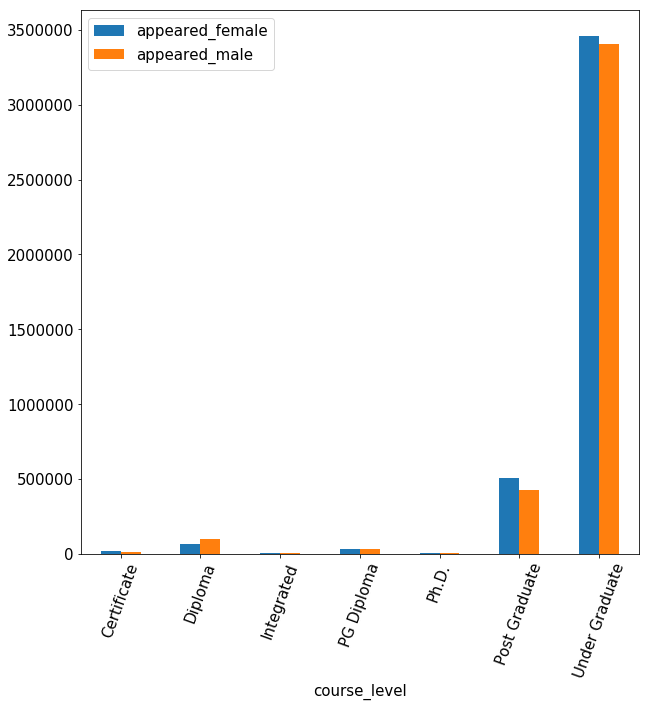

In [45]:
total_by_course_level['appeared_male'] = total_by_course_level['appeared_total'] - total_by_course_level['appeared_female']
total_by_course_level.plot(y=['appeared_female', 'appeared_male'], kind='bar', rot=70)

How abbout adding the no. of people who passed.

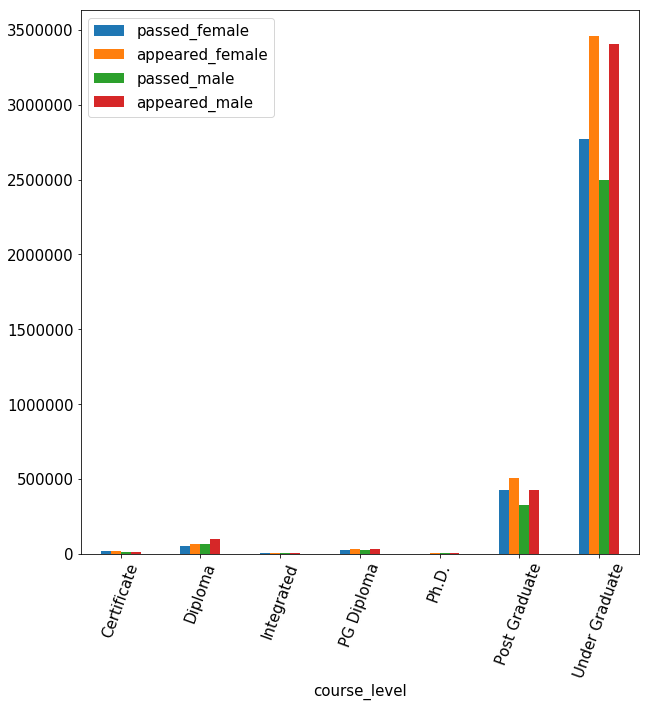

In [46]:
total_by_course_level['passed_male'] = total_by_course_level['passed_total'] - total_by_course_level['passed_female']
total_by_course_level.plot(y=['passed_female', 
                              'appeared_female', 
                              'passed_male', 
                              'appeared_male'], 
                           kind='bar', 
                           rot=70, 
#                            stacked=True,
                          )

Although, this plot is fine, it doesn't give a good feel of comparison. How about we try as below?!

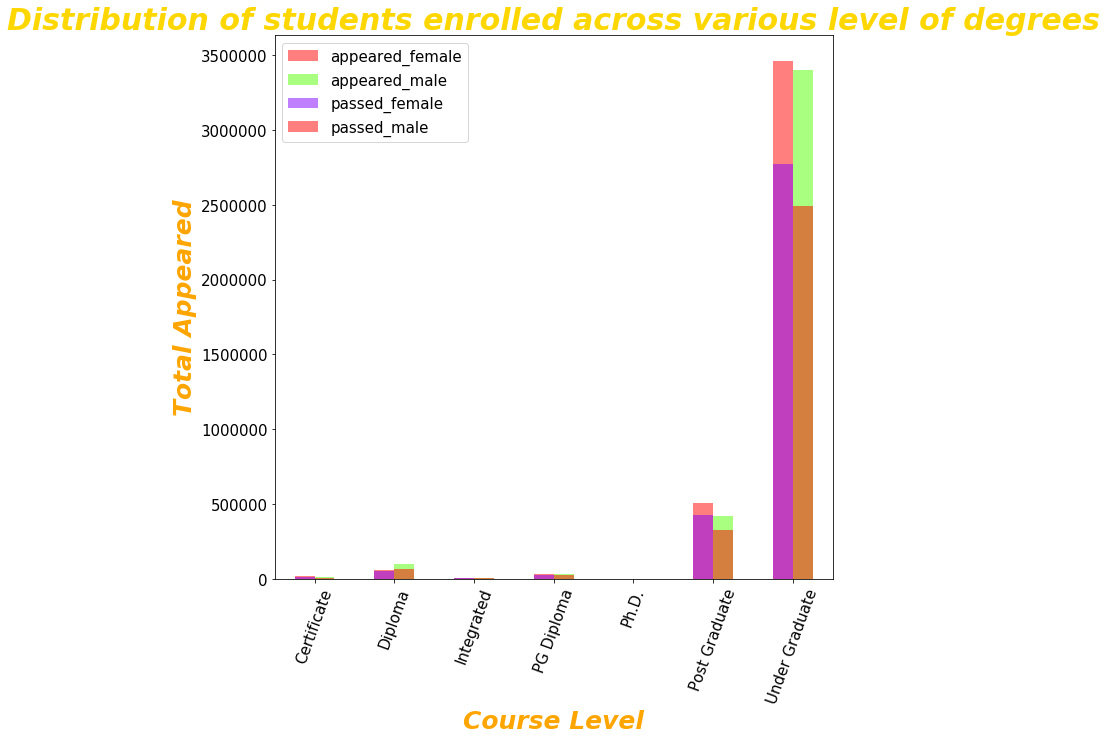

In [50]:
_, ax = plt.subplots()
total_by_course_level.plot(y=['appeared_female', 'appeared_male'], 
                           kind='bar', 
                           ax=ax, 
                           rot=70, 
                           alpha=0.5, 
                           cmap=cm.prism)
total_by_course_level.plot(y=['passed_female', 'passed_male'], 
                           kind='bar', 
                           ax=ax, 
                           rot=70, 
                           alpha=0.5, 
                           cmap=cm.rainbow)
_ = ax.set_ylabel('Total Appeared', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
_ = ax.set_xlabel('Course Level', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
_ = ax.set_title('Distribution of students enrolled across various level of degrees', 
             fontsize=30, 
             weight='bold', 
             style='italic', 
             color='gold'
            )

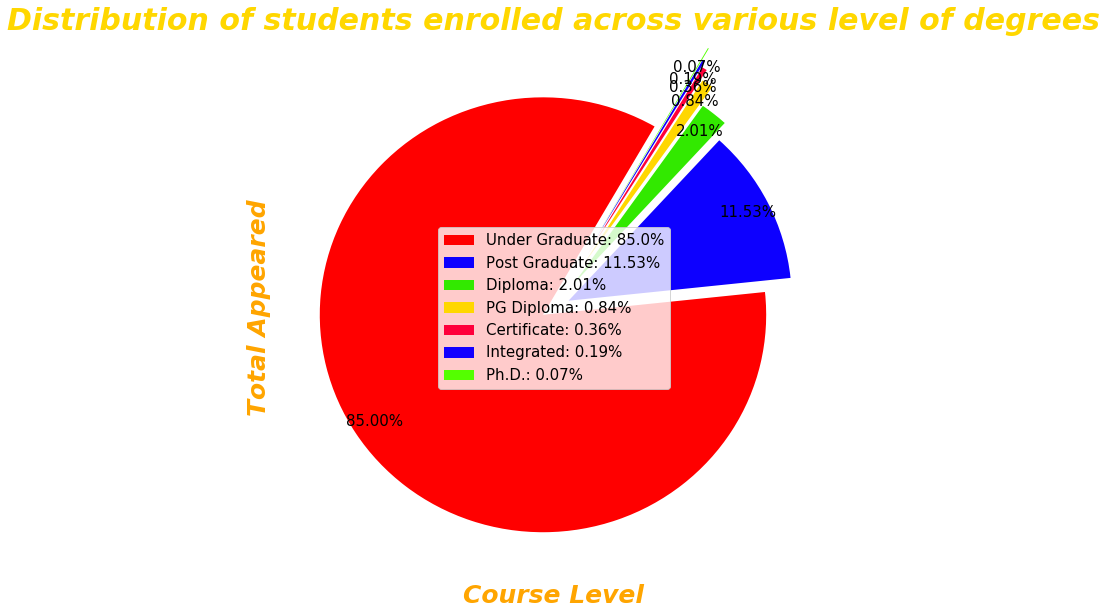

In [51]:
np.random.seed(36)

pct = total_by_course_level['appeared_total'].sort_values(ascending=False) / sum(total_by_course_level['appeared_total']) * 100
labels = total_by_course_level.sort_values('appeared_total', ascending=False).index +': '+ pct.round(2).astype('str') + '%'

ax = total_by_course_level['appeared_total'].sort_values(ascending=False).plot(kind='pie', 
                                                            autopct='%1.2f%%',
                                                            pctdistance=0.9,
                                                            labels=None,
                                                           explode= np.sort(np.random.uniform(0, 0.4, len(total_by_course_level))),
                                                            startangle=60,
                                                            cmap=cm.prism)

ax.legend(labels=labels, 
          loc='center'
         )
ax.set_ylabel('Total Appeared', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
ax.set_xlabel('Course Level', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
ax.set_title('Distribution of students enrolled across various level of degrees', 
             fontsize=30, 
             weight='bold', 
             style='italic', 
             color='gold'
            )
plt.show()

Now, Let's do some Analysis by Stream

In [56]:
total_by_stream_level = results_df.groupby('stream')['passed_female', 'appeared_female', 'passed_total', 'appeared_total'].sum()
total_by_stream_level

,passed_female,appeared_female,passed_total,appeared_total
stream,,,,
Arts,1700117,2118796,2851201,3647818
Commerce,431660,544935,837271,1128028
Law,23403,33462,66488,98565
Management,95951,113670,229553,290324
Science,1044988,1281119,2242796,2907540


Text(0.5,1,'Distribution of students enrolled across various Streams')

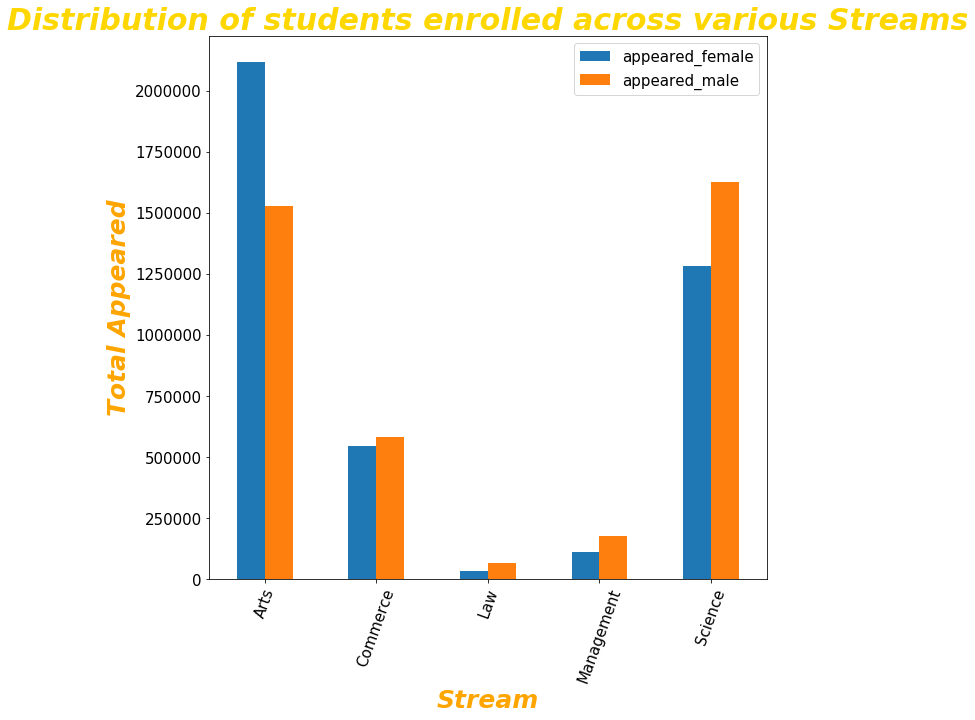

In [59]:
total_by_stream_level['appeared_male'] = total_by_stream_level['appeared_total'] - total_by_stream_level['appeared_female']
total_by_stream_level.plot(y=['appeared_female', 
                              'appeared_male'], 
                           kind='bar', 
                           rot=70)
plt.ylabel('Total Appeared', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
plt.xlabel('Stream', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange'
             )
plt.title('Distribution of students enrolled across various Streams', 
             fontsize=30, 
             weight='bold', 
             style='italic', 
             color='gold'
            )


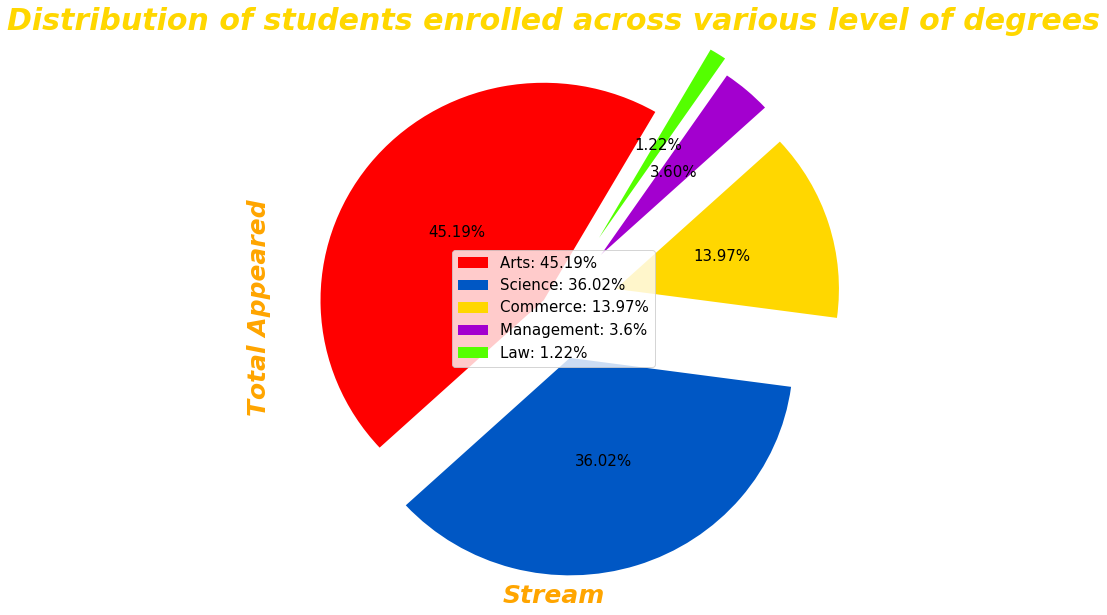

In [60]:
np.random.seed(36)

pct = total_by_stream_level['appeared_total'].sort_values(ascending=False) / sum(total_by_stream_level['appeared_total']) * 100
labels = total_by_stream_level.sort_values('appeared_total', ascending=False).index +': '+ pct.round(2).astype('str') + '%'

ax = total_by_stream_level['appeared_total'].sort_values(ascending=False).plot(kind='pie', 
                                                            autopct='%1.2f%%',
                                                            pctdistance=0.5,
                                                            labels=None,
                                                           explode= np.sort(np.random.uniform(0, 0.4, len(total_by_stream_level))),
                                                            startangle=60,
                                                            cmap=cm.prism)

ax.legend(labels=labels, loc='center')
ax.set_ylabel('Total Appeared', 
              fontsize=25, 
              weight='bold', 
              style='italic', 
              color='orange')
ax.set_xlabel('Stream', 
              fontsize=25,
              weight='bold',
              style='italic',
              color='orange')
ax.set_title('Distribution of students enrolled across various level of degrees',
             fontsize=30,
             weight='bold',
             style='italic',
             color='gold')
plt.show()

# Conclusion

In this tutorial, you have learnt and applied the following concepts:

1. Extensive Data Cleaning.
2. Exploratoy Data Analysis & Visualization.
3. Working with Large Datasets.